# Intro

Data taken from https://platform.who.int/mortality/themes/theme-details/MDB/all-causes. Contains all countries, many years, number of deaths. 

## Imports

In [40]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Load the Excel file

In [3]:
file_path = 'data_deaths.csv'
df = pd.read_csv(file_path)

# Exploratory analysis

## Basic info

In [4]:
print("Basic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314055 entries, 0 to 314054
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Region Code                                                  314055 non-null  object 
 1   Region Name                                                  314055 non-null  object 
 2   Country Code                                                 314055 non-null  object 
 3   Country Name                                                 314055 non-null  object 
 4   Year                                                         314055 non-null  int64  
 5   Sex                                                          314055 non-null  object 
 6   Age group code                                               314055 non-null  object 
 7   Age Group                                     

## Statistics Summary

In [5]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       Region Code Region Name Country Code Country Name           Year  \
count       314055      314055       314055       314055  314055.000000   
unique           6           6          119          119            NaN   
top             EU      Europe          MEX       Mexico            NaN   
freq        126105      126105         4725         4725            NaN   
mean           NaN         NaN          NaN          NaN    1993.423537   
std            NaN         NaN          NaN          NaN      18.275490   
min            NaN         NaN          NaN          NaN    1950.000000   
25%            NaN         NaN          NaN          NaN    1980.000000   
50%            NaN         NaN          NaN          NaN    1996.000000   
75%            NaN         NaN          NaN          NaN    2009.000000   
max            NaN         NaN          NaN          NaN    2022.000000   

           Sex Age group code Age Group        Number  \
count   314055       

## NaN values

In [6]:
print("\nNaN Values per Column:")
print(df.isna().sum())


NaN Values per Column:
Region Code                                                         0
Region Name                                                         0
Country Code                                                        0
Country Name                                                        0
Year                                                                0
Sex                                                                 0
Age group code                                                      0
Age Group                                                           0
Number                                                           1677
Percentage of cause-specific deaths out of total deaths             0
Age-standardized death rate per 100 000 standard population    299727
Death rate per 100 000 population                               30075
dtype: int64


## Empty values 

Assuming empty values are represented as empty strings

In [7]:
print("\nEmpty Values per Column:")
print((df == '').sum())



Empty Values per Column:
Region Code                                                    0
Region Name                                                    0
Country Code                                                   0
Country Name                                                   0
Year                                                           0
Sex                                                            0
Age group code                                                 0
Age Group                                                      0
Number                                                         0
Percentage of cause-specific deaths out of total deaths        0
Age-standardized death rate per 100 000 standard population    0
Death rate per 100 000 population                              0
dtype: int64


## Unique values

In [8]:

print("\nUnique Values per Column:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {len(unique_values)} unique values")



Unique Values per Column:
Region Code: 6 unique values
Region Name: 6 unique values
Country Code: 119 unique values
Country Name: 119 unique values
Year: 73 unique values
Sex: 4 unique values
Age group code: 21 unique values
Age Group: 21 unique values
Number: 41935 unique values
Percentage of cause-specific deaths out of total deaths: 1 unique values
Age-standardized death rate per 100 000 standard population: 14329 unique values
Death rate per 100 000 population: 267220 unique values


## Description of the data-set

What is the data in this dataset? 
- Region code and Name, Country Code and Name. 
- Years: 1950 - 2022
- Sex: All, Male, Female, Unknown. 
- Age group code, Age Group: Every 4 years up to 85+.
- Number and following: the data itself.

Checking for Sweden, 2015, all Age Group, and having a look on the data structure for the Sex. 

In [25]:
df_example = df[(df["Age Group"] == "[All]") & \
               (df["Year"] == 2015) & \
               (df["Country Name"] == "Sweden") ]
df_example

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
305298,EU,Europe,SWE,Sweden,2015,All,Age_all,[All],91002.0,100,369.747821,938.541381
305319,EU,Europe,SWE,Sweden,2015,Male,Age_all,[All],44542.0,100,443.052593,919.662499
305340,EU,Europe,SWE,Sweden,2015,Female,Age_all,[All],46460.0,100,307.394514,957.383257


Here, it is clear that the Sex "All" is the sum of "Male" and "Female". Doing the same for understanding the "Sex" column, 

In [26]:
df_example_2 = df[(df["Sex"] == "All") & \
               (df["Year"] == 2015) & \
               (df["Country Name"] == "Sweden") ]
df_example_2

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
305298,EU,Europe,SWE,Sweden,2015,All,Age_all,[All],91002.0,100,369.747821,938.541381
305299,EU,Europe,SWE,Sweden,2015,All,Age00,[0],282.0,100,NaN,245.336860
305300,EU,Europe,SWE,Sweden,2015,All,Age01_04,[1-4],59.0,100,NaN,12.643471
305301,EU,Europe,SWE,Sweden,2015,All,Age05_09,[5-9],38.0,100,NaN,6.728260
305302,EU,Europe,SWE,Sweden,2015,All,Age10_14,[10-14],57.0,100,NaN,11.010301
305303,EU,Europe,SWE,Sweden,2015,All,Age15_19,[15-19],123.0,100,NaN,22.972126
305304,EU,Europe,SWE,Sweden,2015,All,Age20_24,[20-24],307.0,100,NaN,45.702580
305305,EU,Europe,SWE,Sweden,2015,All,Age25_29,[25-29],370.0,100,NaN,57.497611
305306,EU,Europe,SWE,Sweden,2015,All,Age30_34,[30-34],340.0,100,NaN,56.227762
305307,EU,Europe,SWE,Sweden,2015,All,Age35_39,[35-39],367.0,100,NaN,60.497165


In [15]:
It is possible then to see that "All" have all aggregates, but the data has the individual information. 

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population


In [9]:
df[df["Country Name"] == "Sweden"]

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
233457,EU,Europe,SWE,Sweden,1951,All,Age_all,[All],69799.0,100,878.907709,987.214121
233458,EU,Europe,SWE,Sweden,1951,All,Age00,[0],2378.0,100,NaN,2152.036199
233459,EU,Europe,SWE,Sweden,1951,All,Age01_04,[1-4],600.0,100,NaN,122.649223
233460,EU,Europe,SWE,Sweden,1951,All,Age05_09,[5-9],363.0,100,NaN,59.861478
233461,EU,Europe,SWE,Sweden,1951,All,Age10_14,[10-14],210.0,100,NaN,45.971979
...,...,...,...,...,...,...,...,...,...,...,...,...
313357,EU,Europe,SWE,Sweden,2019,Unknown,Age70_74,[70-74],12.0,100,NaN,NaN
313358,EU,Europe,SWE,Sweden,2019,Unknown,Age75_79,[75-79],7.0,100,NaN,NaN
313359,EU,Europe,SWE,Sweden,2019,Unknown,Age80_84,[80-84],3.0,100,NaN,NaN
313360,EU,Europe,SWE,Sweden,2019,Unknown,Age85_over,[85+],10.0,100,NaN,NaN


# Totals per country

Let us check Sweden, all years from 2000, aggregated data. 

In [50]:
df_sweden = df[(df["Sex"] == "All") & \
              (df["Age Group"] == "[All]") & \
              (df["Country Name"] == "Sweden") & \
              (df["Year"] >= 1980)].sort_values("Year")


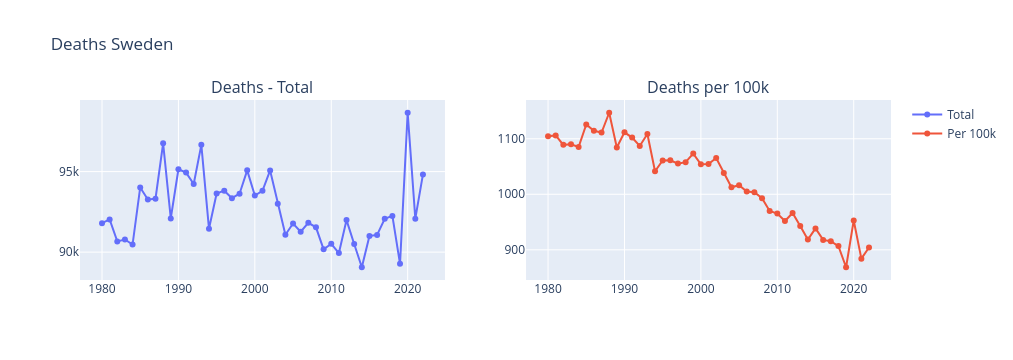

In [51]:
# Create subplots: use 'domain' type for pie charts
fig = make_subplots(rows=1, cols=2, subplot_titles=('Deaths - Total', 'Deaths per 100k'))

# Add traces
fig.add_trace(go.Scatter(x=df_sweden['Year'], y=df_sweden['Number'], mode='lines+markers', name='Total'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_sweden['Year'], y=df_sweden['Death rate per 100 000 population'], mode='lines+markers', name='Per 100k'), row=1, col=2)

# Update layout
fig.update_layout(title_text='Deaths Sweden')

# Show the plot
fig.show()

Covid started january 31st of 2019 in Sweden. Deaths should have been registered in 2020. Covid vaccines in Sweden started december 27 of 2020. Deaths should have been seen mainly in 2021 (and 3 days of 2020). So, 
- 2020 due to Covid. 
- 2021 due to vaccines. 

Some questions that follow this graph:
- What happened in 2022? here seems to be a growing trend of deaths. If "so many" died, then next year the deaths should have had decreased, but here it is clearly increasing. 
- Which age group was most affected due to covid, i.e. 2020? And the vaccine i.e. 2021?
- Is there any country that resisted the vaccination? How is this trend looking there? US can be taken as a country that accepted the vaccination, and there are several that rejected: Haiti, Tanzania, and Madagascar from beggining, and Denmark, Norway, Germany, France, and Italy halted the application of the vaccine until it wsa further investigated. 


In [34]:
df_swe_2015 = df_sweden[df_sweden["Year"] > 2010]
df_swe_2015

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
237237,EU,Europe,SWE,Sweden,2011,All,Age_all,[All],89941.0,100,379.000474,951.835883
237300,EU,Europe,SWE,Sweden,2012,All,Age_all,[All],91990.0,100,381.568960,966.344954
237363,EU,Europe,SWE,Sweden,2013,All,Age_all,[All],90505.0,100,373.733815,942.723248
237426,EU,Europe,SWE,Sweden,2014,All,Age_all,[All],89062.0,100,362.983740,918.533356
305109,EU,Europe,SWE,Sweden,2018,All,Age_all,[All],92250.0,100,352.890964,906.614883
305172,EU,Europe,SWE,Sweden,2017,All,Age_all,[All],92075.0,100,357.081770,915.467979
305235,EU,Europe,SWE,Sweden,2016,All,Age_all,[All],91071.0,100,359.802655,917.769020
305298,EU,Europe,SWE,Sweden,2015,All,Age_all,[All],91002.0,100,369.747821,938.541381
313068,EU,Europe,SWE,Sweden,2022,All,Age_all,[All],94823.0,100,335.376554,904.200758
313131,EU,Europe,SWE,Sweden,2021,All,Age_all,[All],92079.0,100,335.911070,884.031060


In [26]:
df_country = df[["Country Name", "Death rate per 100 000 population", "Year"]].groupby(["Country Name", "Year"]).count()
df_country

Death rate per 100 000 population
Country Name                       Year                                   
Albania                            1987                                 60
                                   1988                                 60
                                   1989                                 60
                                   1992                                 60
                                   1993                                 60
...                                                                    ...
Venezuela (Bolivarian Republic of) 2012                                 60
                                   2013                                 60
                                   2014                                 60
                                   2015                                 60
                                   2016                                 60

[4869 rows x 1 columns]

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
233457,EU,Europe,SWE,Sweden,1951,All,Age_all,[All],69799.0,100,878.907709,987.214121
233458,EU,Europe,SWE,Sweden,1951,All,Age00,[0],2378.0,100,NaN,2152.036199
233459,EU,Europe,SWE,Sweden,1951,All,Age01_04,[1-4],600.0,100,NaN,122.649223
233460,EU,Europe,SWE,Sweden,1951,All,Age05_09,[5-9],363.0,100,NaN,59.861478
233461,EU,Europe,SWE,Sweden,1951,All,Age10_14,[10-14],210.0,100,NaN,45.971979
...,...,...,...,...,...,...,...,...,...,...,...,...
313357,EU,Europe,SWE,Sweden,2019,Unknown,Age70_74,[70-74],12.0,100,NaN,NaN
313358,EU,Europe,SWE,Sweden,2019,Unknown,Age75_79,[75-79],7.0,100,NaN,NaN
313359,EU,Europe,SWE,Sweden,2019,Unknown,Age80_84,[80-84],3.0,100,NaN,NaN
313360,EU,Europe,SWE,Sweden,2019,Unknown,Age85_over,[85+],10.0,100,NaN,NaN
